In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e20/sample_submission.csv
/kaggle/input/playground-series-s3e20/train.csv
/kaggle/input/playground-series-s3e20/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("/kaggle/input/playground-series-s3e20/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s3e20/test.csv")

In [4]:
df.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [5]:
df.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [6]:
df.shape

(79023, 76)

In [7]:
corr_matrix = df.corr()

/tmp/ipykernel_20/3147368345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


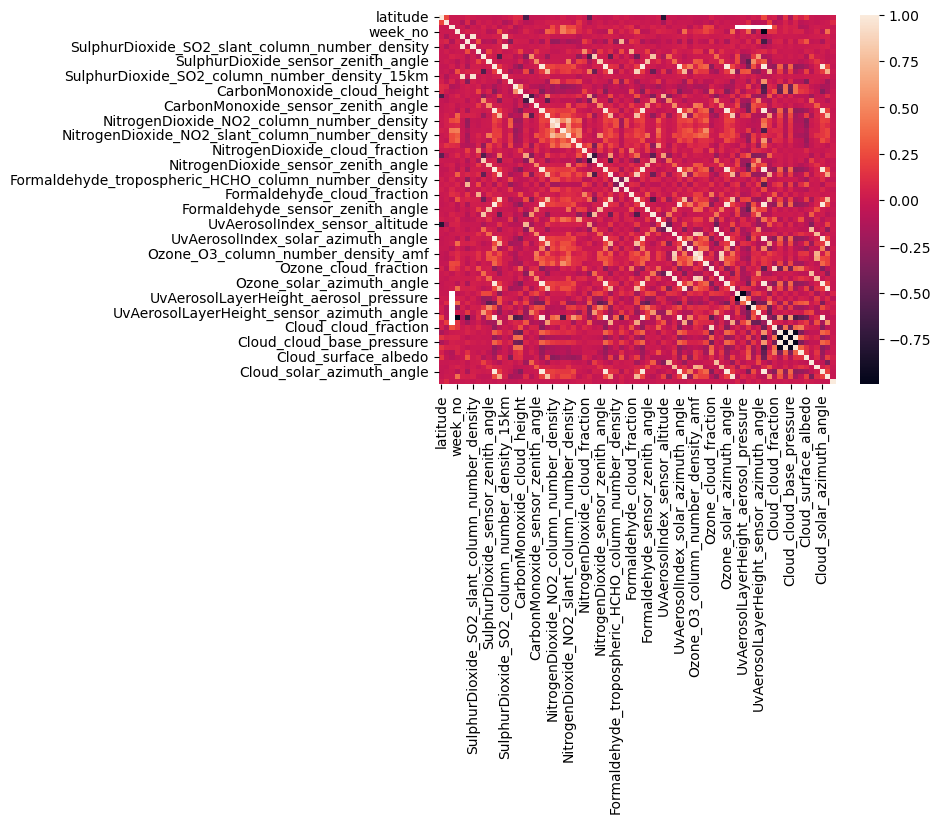

In [8]:
sns.heatmap(corr_matrix)
plt.show()

In [9]:
corr_matrix["UvAerosolLayerHeight_aerosol_pressure"]["week_no"]

0.04951146331737151

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
df["year"] = pd.factorize(df["year"])[0] + 1
df = df.fillna(0)

In [12]:
df = df.dropna()

In [13]:
df.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,...,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000,79023.000000
mean,-1.891072,29.880155,2.000000,26.000000,0.000039,0.680509,0.000029,0.129131,-6.460613,30.515352,...,5558.125290,59056.360071,4641.825418,19.022017,0.269797,-10.718777,40.189307,-86.268946,27.754940,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000246,0.364751,0.000186,0.089068,58.101325,19.349423,...,1489.463877,10144.697147,1403.221989,13.587799,0.053641,30.292988,7.143012,38.324332,4.901252,144.299648
min,-3.299000,28.228000,1.000000,0.000000,-0.000996,0.000000,-0.000887,0.000000,-179.537059,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-102.739731,0.000000,-153.464211,0.000000,0.000000
25%,-2.451000,29.262000,1.000000,13.000000,-0.000065,0.604531,-0.000053,0.049481,-41.806629,16.574081,...,4574.146003,53040.596343,3660.259169,9.892939,0.240753,-30.276399,35.775800,-125.822386,24.614167,9.797995
50%,-1.882000,29.883000,2.000000,26.000000,0.000000,0.762808,0.000000,0.140023,0.000000,34.097309,...,5563.087848,59255.784608,4610.696783,15.061696,0.272412,-12.653263,41.073490,-84.030676,28.289776,45.593445
75%,-1.303000,30.471000,3.000000,39.000000,0.000117,0.905362,0.000093,0.199492,30.969258,44.906770,...,6534.822189,65612.718663,5566.268062,23.708138,0.302675,9.250658,44.423683,-47.680857,31.481630,109.549595
max,-0.510000,31.532000,3.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,0.000000,42.060436,3167.768000


In [14]:
X = df.drop(["ID_LAT_LON_YEAR_WEEK", "emission"], axis=1)
y = df["emission"]

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model = LinearRegression()

In [17]:
lr_model.fit(X, y)

LinearRegression()

In [18]:
dev_pred = lr_model.predict(X)

In [19]:
def rmse(y_true, y_pred):
    from sklearn.metrics import mean_squared_error
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [20]:
rmse(dev_pred, y)

142.25429866076897

In [21]:
test_df = test_df.fillna(0)

In [22]:
test_df

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle
0,ID_-0.510_29.290_2022_00,-0.510,29.290,2022,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,36022.027344,8472.313477,41047.937500,7472.313477,7.935617,0.240773,-100.113792,33.697044,-133.047546,33.779583
1,ID_-0.510_29.290_2022_01,-0.510,29.290,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,48539.737242,6476.147323,54915.708579,5476.147161,11.448437,0.293119,-30.510319,42.402593,-138.632822,31.012380
2,ID_-0.510_29.290_2022_02,-0.510,29.290,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,34133.080469,8984.795703,39006.093750,7984.795703,10.753179,0.267130,39.087361,45.936480,-144.784988,26.743361
3,ID_-0.510_29.290_2022_03,-0.510,29.290,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,50854.991076,6014.724059,57646.368368,5014.724115,11.764556,0.304679,-24.465127,42.140419,-135.027891,29.604774
4,ID_-0.510_29.290_2022_04,-0.510,29.290,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,46594.685145,6849.280477,52896.541873,5849.280394,13.065317,0.284221,-12.907850,30.122641,-135.500119,26.276807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24348,ID_-3.299_30.301_2022_44,-3.299,30.301,2022,44,-0.000618,0.745549,-0.000461,0.234492,72.306198,...,48839.430415,6260.120033,55483.459980,5260.120056,30.398508,0.180046,-25.528588,45.284576,-116.521412,29.992562
24349,ID_-3.299_30.301_2022_45,-3.299,30.301,2022,45,0.000000,0.000000,0.000000,0.000000,0.000000,...,47042.694849,6678.843299,53589.917383,5678.951521,19.223844,0.177833,-13.380005,43.770351,-122.405759,29.017975
24350,ID_-3.299_30.301_2022_46,-3.299,30.301,2022,46,0.000000,0.000000,0.000000,0.000000,0.000000,...,55337.148173,5336.282475,62646.761340,4336.282491,13.801194,0.219471,-5.072065,33.226455,-124.530639,30.187472
24351,ID_-3.299_30.301_2022_47,-3.299,30.301,2022,47,0.000071,1.003805,0.000077,0.205077,74.327427,...,44813.691428,7188.578533,50728.313991,6188.578464,27.887489,0.247275,-0.668714,45.885617,-129.006797,30.427455


In [23]:
pred = lr_model.predict(test_df.drop(["ID_LAT_LON_YEAR_WEEK"], axis=1))

In [24]:
pred

array([4915.00395902, 4928.66114768, 4918.34454243, ..., 4964.13334094,
       4977.55786871, 4967.41744057])

In [25]:
submission_df = pd.DataFrame(zip(test_df["ID_LAT_LON_YEAR_WEEK"], pred), columns=["ID_LAT_LON_YEAR_WEEK","emission"])

In [26]:
submission_df

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,4915.003959
1,ID_-0.510_29.290_2022_01,4928.661148
2,ID_-0.510_29.290_2022_02,4918.344542
3,ID_-0.510_29.290_2022_03,4917.699991
4,ID_-0.510_29.290_2022_04,4948.515723
...,...,...
24348,ID_-3.299_30.301_2022_44,4964.215163
24349,ID_-3.299_30.301_2022_45,4948.733539
24350,ID_-3.299_30.301_2022_46,4964.133341
24351,ID_-3.299_30.301_2022_47,4977.557869


In [27]:
submission_df.to_csv("submission.csv", index=False)

## XGBoost

In [28]:
# from xgboost import XGBModel

In [29]:
# xgb_model = XGBModel()

In [30]:
# xgb_model.fit(X_train_std, y_train)

In [31]:
# xgb_pred = xgb_model.predict(X_dev_std)

In [32]:
# rmse(xgb_pred, y_dev)